In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def subset(x, interval=10):
    x_new = []
    for i in range(len(x)):
        if i % interval == 0:
            x_new.append(x[i])
    return x_new

plot_legend = False

protein="5eqi"
df = pd.DataFrame()
for i, item in enumerate(["", "_asp91", "_trp333"]):
    # Collect data from all replicates:
    for rep in range(3):
        x,y = np.loadtxt(f"pca/out/{protein}{item}_rep{rep+1}.everything.bb_test.xvg",comments=["@", "#"],unpack=True)
        data = {"x" : subset(x, 10), 
                "y": subset(y, 10), 
                "Replicate" : "rep " + str(rep+1) ,
                "item" : f"{protein}{item}"
                }
        
        df = pd.concat([df, pd.DataFrame(data)])
protein="4zw9"
for i, item in enumerate(["", "_asp89", "_trp331"]):
    # Collect data from all replicates:
    for rep in range(3):
        x,y = np.loadtxt(f"pca/out/{protein}{item}_rep{rep+1}.everything.bb_test.xvg",comments=["@", "#"],unpack=True)
        data = {"x" : subset(x, 10), 
                "y": subset(y, 10), 
                "Replicate" : "rep " + str(rep+1) ,
                "item" : f"{protein}{item}"
                }
        
        df = pd.concat([df, pd.DataFrame(data)])
df

,x,y,Replicate,item
0,-2.12372,1.02878,rep 1,5eqi
1,-0.79295,1.26331,rep 1,5eqi
2,-1.38245,1.06163,rep 1,5eqi
3,-1.88445,1.26280,rep 1,5eqi
4,-0.90946,1.44989,rep 1,5eqi
...,...,...,...,...
22077,0.51698,-2.09070,rep 3,4zw9_trp331
22078,0.03991,-2.10074,rep 3,4zw9_trp331
22079,0.38930,-1.95494,rep 3,4zw9_trp331
22080,0.79782,-2.37929,rep 3,4zw9_trp331


In [2]:
def hist_overlap(a, b):
    """Overlap between histograms

    Args:
        a (list): List a
        b (list): List b

    Returns:
        float: fraction overlap
    """    
    sm = 0
    for i in range(len(a)):
        sm += min(a[i], b[i])
    return sm/sum(a)

def hist_shift(a_hist, a_edge, b_hist, b_edge):
    """Calculate Peak shift

    Args:
        a (list): List a
        b (list): List b
    
    Returns:
        float: Shift
    """
    peak1 = a_edge[a_hist.argmax(axis=0)]
    peak2 = b_edge[b_hist.argmax(axis=0)]
    return peak2 - peak1


In [3]:
prot1 = df[df['item'] == "5eqi"]
prot2 = df[df['item'] == "5eqi_trp333"]
prot3 = df[df['item'] == "5eqi_asp91"]


for i, pc in enumerate(['x', 'y']):
    print(f"PC{i+1}")
    min_d, max_d = np.min(df['x']), np.max(df['x'])
    bins = np.arange(np.round(min_d, 2), max_d, 0.005)

    hist1_vals, hist1_edge = np.histogram(prot1[pc], bins=bins)
    hist2_vals, hist2_edge = np.histogram(prot2[pc], bins=bins)
    hist3_vals, hist3_edge = np.histogram(prot3[pc], bins=bins)

    print(f"{hist_overlap(hist1_vals, hist2_vals)*100:.2f}%")
    print(f"{hist_shift(hist1_vals, hist1_edge, hist2_vals, hist2_edge):.2f}")
    
    print(f"{hist_overlap(hist1_vals, hist3_vals)*100:.2f}%")
    print(f"{hist_shift(hist1_vals, hist1_edge, hist3_vals, hist3_edge):.2f}")

    print(f"{hist_overlap(hist2_vals, hist3_vals)*100:.2f}%")
    print(f"{hist_shift(hist2_vals, hist2_edge, hist3_vals, hist3_edge):.2f}")
    print()


PC1
87.87%
0.17
68.59%
-1.10
65.17%
-1.28

PC2
69.76%
-1.34
66.01%
-1.32
93.61%
0.02



Text(0.5, 1.0, 'TRP333')

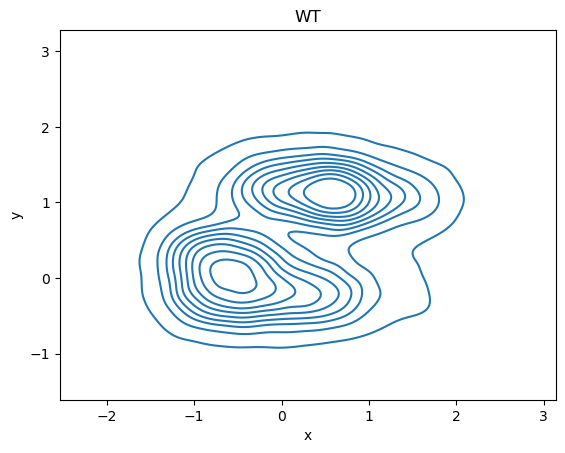

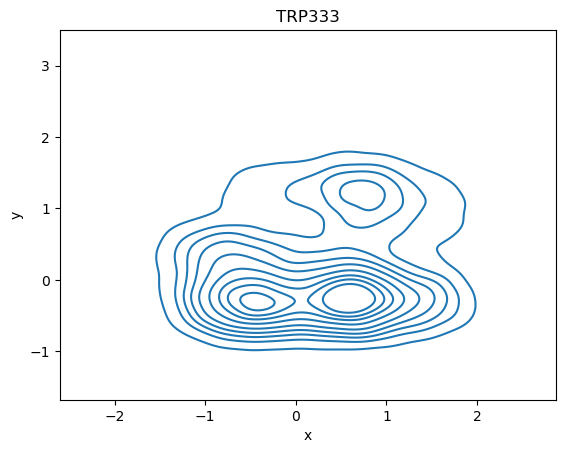

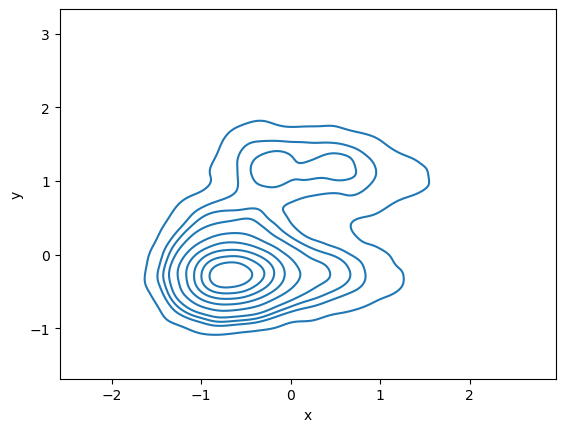

In [5]:
ax = sns.kdeplot(data=prot1, x="x", y="y")
ax.set_title("WT")
plt.figure()
ax = sns.kdeplot(data=prot2, x="x", y="y")
ax.set_title("ASP91")
plt.figure()
ax = sns.kdeplot(data=prot3, x="x", y="y")
ax.set_title("TRP333")

In [6]:
prot1 = df[df['item'] == "4zw9"]
prot2 = df[df['item'] == "4zw9_trp331"]
prot3 = df[df['item'] == "4zw9_asp89"]


for i, pc in enumerate(['x', 'y']):
    print(f"PC{i+1}")
    min_d, max_d = np.min(df['x']), np.max(df['x'])
    bins = np.arange(np.round(min_d, 2), max_d, 0.01)

    hist1_vals, hist1_edge = np.histogram(prot1['x'], bins=bins)
    hist2_vals, hist2_edge = np.histogram(prot2['x'], bins=bins)
    hist3_vals, hist3_edge = np.histogram(prot3['x'], bins=bins)

    print(f"{hist_overlap(hist1_vals, hist2_vals)*100:.2f}%")
    print(f"{hist_shift(hist1_vals, hist1_edge, hist2_vals, hist2_edge):.2f}")
    print(f"{hist_overlap(hist1_vals, hist3_vals)*100:.2f}%")
    print(f"{hist_shift(hist1_vals, hist1_edge, hist3_vals, hist3_edge):.2f}")
    print()


PC1
72.75%
0.10
69.46%
-0.02

PC2
72.75%
0.10
69.46%
-0.02



Text(0.5, 1.0, 'TRP333')

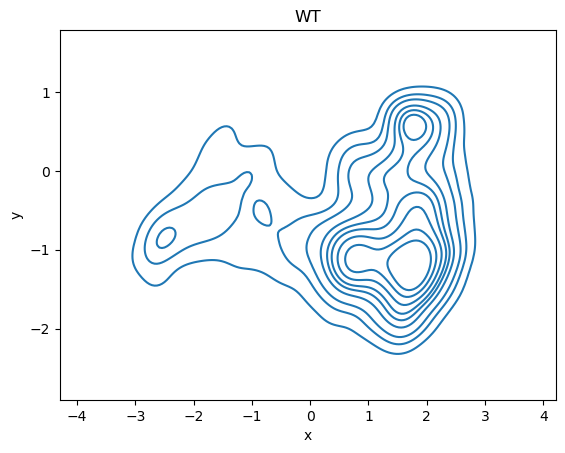

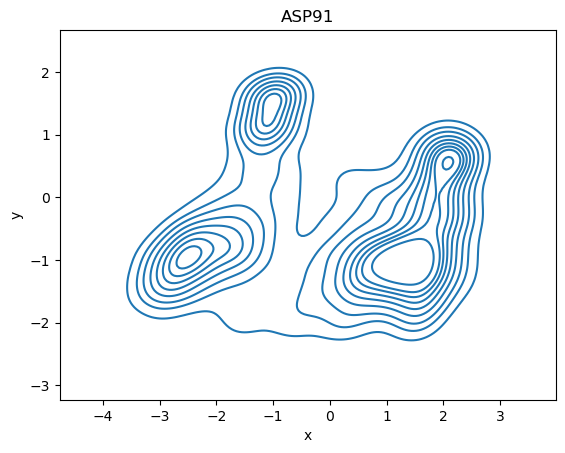

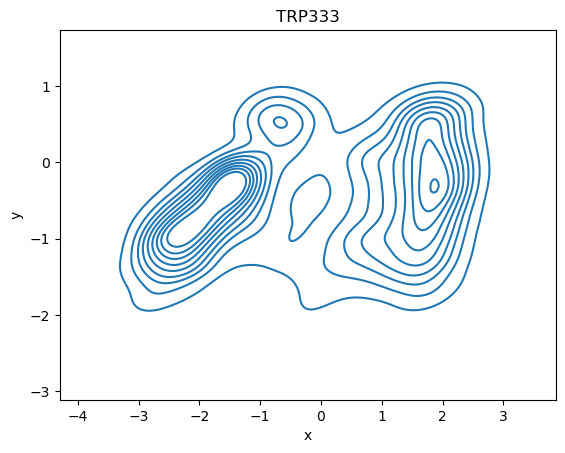

In [7]:
ax = sns.kdeplot(data=prot1, x="x", y="y")
ax.set_title("WT")
plt.figure()
ax = sns.kdeplot(data=prot2, x="x", y="y")
ax.set_title("ASP91")
plt.figure()
ax = sns.kdeplot(data=prot3, x="x", y="y")
ax.set_title("TRP333")